#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [33]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

1 - Basic Data Exploration

In [34]:
print ("here we can see the number of rows and columns in the dataset :")
print(df.shape)
print ("the data types of each column :")
print(df.dtypes)
print ("the number of missing values in each column :")
print(df.isnull().sum())
df.info()

here we can see the number of rows and columns in the dataset :
(148654, 13)
the data types of each column :
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object
the number of missing values in each column :
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 co

2 - Descriptive Statistics

In [35]:
import statistics

df_cp = df.copy()

mean = df_cp['TotalPay'].mean()
print(f"mean of salary {mean}")
median = df_cp['TotalPay'].median()
print(f"median of salary {median}")
mo = statistics.mode(df_cp['TotalPay'])
print(f"mode of salary {mo}")
minimum = df_cp['TotalPay'].min()
print(f"minimum salary {minimum}")
maximum = df_cp['TotalPay'].max()
print(f"maximum salary {maximum}")
print(f"the range of salaries is from {minimum} to {maximum}")
sd = np.std(df_cp['TotalPay'])
print(f"the standard deviation {sd}")

mean of salary 74768.321971703
median of salary 71426.60999999999
mode of salary 0.0
minimum salary -618.13
maximum salary 567595.43
the range of salaries is from -618.13 to 567595.43
the standard deviation 50516.8353589452


3 -Data Cleaning

In [36]:
# having 0 or nan in BasePay isnt logical so i replaced the missing valuse with mean
mean_basepay = df_cp['BasePay'].mean()
df_cp['BasePay'].fillna(mean_basepay, inplace=True)

# having 0 in OvertimePay is logical so i replaced the missing valuse with 0
df_cp['OvertimePay'].fillna(0, inplace=True)

# having 0 or nan in OtherPay isnt logical so i replaced the missing valuse with mean
mean_otherpay = df_cp['OtherPay'].mean()
df_cp['OtherPay'].fillna(mean_otherpay, inplace=True)

# having 0 in Benefits is logical so i replaced the missing valuse with 0
df_cp['Benefits'].fillna(0, inplace=True)

# the Notes and Status column doesnt seem important 
# and i belive it shoud be having string value so dropping it the best solution
df_cp.drop('Notes', axis=1, inplace=True)
df_cp.drop('Status', axis=1, inplace=True)

print("we dont have any missing valuse lift")
print(df_cp.isnull().sum())

we dont have any missing valuse lift
Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64


4 -Basic Data Visualization

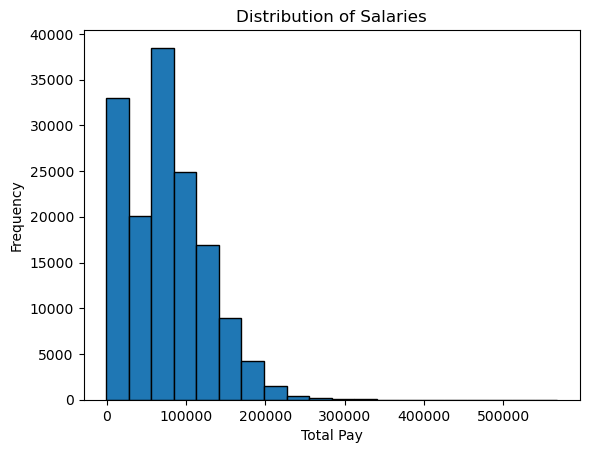

In [38]:
plt.hist(df_cp['TotalPay'], bins=20, edgecolor='black')

plt.xlabel('Total Pay')
plt.ylabel('Frequency')
plt.title('Distribution of Salaries')

plt.show()

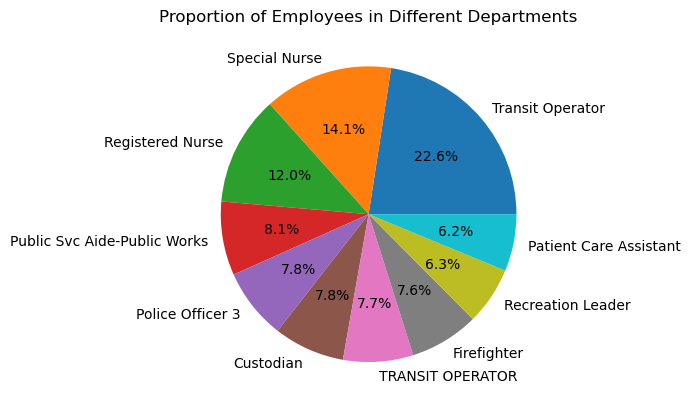

In [43]:
# there are lots and lots of departments i will make the piie for the top 10 ones if its for all its unreadable
department_counts = df_cp['JobTitle'].value_counts()
top_departments = department_counts.head(10)
plt.pie(top_departments, labels=top_departments.index, autopct='%1.1f%%')
plt.title('Proportion of Employees in Different Departments')
plt.show()

5 - Grouped Analysis

In [45]:
# Group the data by year
summary_stats_by_year = df_cp.groupby('Year')['TotalPay'].describe()
print(summary_stats_by_year)

        count          mean           std     min         25%        50%  \
Year                                                                       
2011  36159.0  71744.103871  47498.706594    0.00  36810.7600  68213.240   
2012  36766.0  74113.262265  49523.904319    0.00  37560.6075  70714.680   
2013  37606.0  77611.443142  52854.774783    0.00  36754.9950  74500.015   
2014  38123.0  75463.918140  51697.713029 -618.13  33436.2100  72359.980   

             75%        max  
Year                         
2011  102512.680  567595.43  
2012  104099.170  362844.66  
2013  109637.670  347102.32  
2014  107974.445  471952.64  


In [47]:
# Group the data by JobTitle
summary_stats_by_JobTitle = df_cp.groupby('JobTitle')['TotalPay'].describe()
print(summary_stats_by_JobTitle)

                                                count          mean  \
JobTitle                                                              
ACCOUNT CLERK                                    83.0  44035.664337   
ACCOUNTANT                                        5.0  47429.268000   
ACCOUNTANT INTERN                                48.0  29031.742917   
ACPO,JuvP, Juv Prob (SFERS)                       1.0  62290.780000   
ACUPUNCTURIST                                     1.0  67594.400000   
...                                               ...           ...   
X-RAY LABORATORY AIDE                            26.0  52705.880385   
X-Ray Laboratory Aide                           100.0  50823.942700   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS    1.0  53632.870000   
Youth Comm Advisor                                4.0  41414.307500   
ZOO CURATOR                                       1.0  66686.560000   

                                                         std       min  \
Jo

In [51]:
# Group the data by Agency
summary_stats_by_Agency = df_cp.groupby('Agency')['TotalPay'].describe()
print(summary_stats_by_Agency)

                  count          mean           std     min        25%  \
Agency                                                                   
San Francisco  148654.0  74768.321972  50517.005274 -618.13  36168.995   

                    50%         75%        max  
Agency                                          
San Francisco  71426.61  105839.135  567595.43  


6 - Simple Correlation Analysis 

Correlation Coefficient: 0.9505142922626416


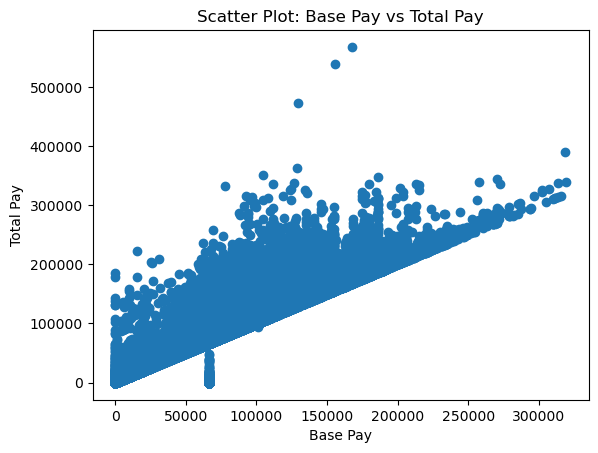

In [52]:
# i choose dentify correlation Coefficient between salary and BasePay
correlation_coefficient = np.corrcoef(df_cp['BasePay'], df_cp['TotalPay'])[0, 1]
print("Correlation Coefficient:", correlation_coefficient)
plt.scatter(df_cp['BasePay'], df_cp['TotalPay'])
plt.xlabel('Base Pay')
plt.ylabel('Total Pay')
plt.title('Scatter Plot: Base Pay vs Total Pay')
plt.show()

Correlation Coefficient: 0.977312852207212


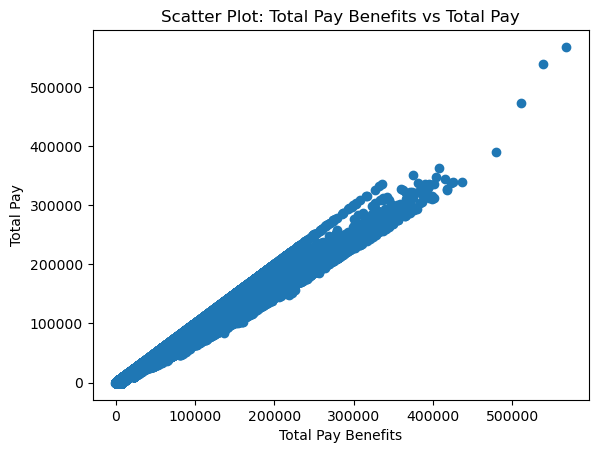

In [53]:
# i choose dentify correlation Coefficient between salary and TotalPayBenefits
correlation_coefficient2 = np.corrcoef(df_cp['TotalPayBenefits'], df_cp['TotalPay'])[0, 1]
print("Correlation Coefficient:", correlation_coefficient2)
plt.scatter(df_cp['TotalPayBenefits'], df_cp['TotalPay'])
plt.xlabel('Total Pay Benefits')
plt.ylabel('Total Pay')
plt.title('Scatter Plot: Total Pay Benefits vs Total Pay')
plt.show()

7 - Summary of Insights

Basic Data Visualization:

Histogram of Salaries: The histogram provided a visual representation of the distribution of salaries in the dataset. It showed the frequency of different salary ranges, allowing for a better understanding of the salary distribution.

Pie Chart of Departments: The pie chart displayed the proportion of employees in different departments. It provided an overview of the distribution of employees across various departments in the organization.

Grouped Analysis:

Average Salaries by Year: By grouping the data by the 'Year' column and calculating the average salaries, we observed the changes in average salaries over time. This analysis helped identify any trends or patterns in salary variations across different years.

Average Salaries by Other Columns: Further grouping the data by other columns, such as 'JobTitle' or 'Department', provided insights into the average salaries within different job titles or departments. This allowed for comparisons and identification of any salary discrepancies or variations across different groups.

Correlation Analysis:

Correlation between Salary and Base Pay: The correlation analysis between 'BasePay' and 'TotalPay' revealed the strength and direction of the relationship between these two variables. The correlation coefficient indicated the degree of linear association between base pay and total pay. A positive correlation coefficient suggests that an increase in base pay is associated with an increase in total pay, while a negative correlation coefficient indicates the opposite.

Scatter Plot Visualization: The scatter plot provided a visual representation of the relationship between base pay and total pay. It allowed for a better understanding of how the two variables are distributed and whether there are any noticeable patterns or trends.

Overall, these analyses provided valuable insights into the dataset. The basic data visualization techniques helped visualize the distribution of salaries and the proportion of employees in different departments. The grouped analysis allowed for comparisons of average salaries across different years, job titles, or departments. The correlation analysis and scatter plot visualization helped identify the relationship between base pay and total pay.

These findings can be further analyzed and interpreted to gain deeper insights into the dataset and inform decision-making processes. 

# Good Luck!